### Imports

In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import re

### Dependencies

    For this to work, change the filename and filename1 to the paths of anonymized_project.json and references.json on your local machine

In [2]:
filename = "./[EXT] anonymized_bicycle 1.1/anonymized_project.json"
filename1 = "./[EXT] anonymized_bicycle 1.1/references.json"

### Normalizing and flattening the json files

In [3]:
# Opening and loading the json files. "data" corresponds to "filename" and "anonymized_project.json"
# "data1" corresponds to "filename1" and "references.json"

try:
    with open(filename, "r") as f:
        data = json.loads(f.read())   
except:
    raise Exception(f"Reading {filename} file encountered an error")
    
try:
      with open(filename1, "r") as f1:
            data1 = json.loads(f1.read())
except:
    raise Exception(f"Reading {filename1} file encountered an error")


In [4]:
# Getting the reference dataframe df1
df1 = pd.DataFrame(data1.items(),  columns=['image', 'answer'])

"""
This function return the value of a dictionary
"""
def get_bool(d):
    for k,v in d.items():
        return(v)
    
df1["answer"] = df1['answer'].apply(get_bool)
df1["answer"] = df1['answer'].map({False: "no", True: "yes"})
df1.head(3)

,image,answer
0,img_4686,no
1,img_8607,yes
2,img_5541,no


In [5]:
# Getting the answer dataframe df
data = data['results']['root_node']['results'] # getting the relevant information
new_data = []
for k in data.keys():
    new_data.extend(data[k]['results'])

df = pd.json_normalize(new_data)
df.head(3)

,created_at,workpackage_total_size,loss,project_node_input_id,project_node_output_id,project_root_node_input_id,task_input.image_url,task_output.answer,task_output.cant_solve,task_output.corrupt_data,task_output.duration_ms,user.vendor_id,user.id,user.vendor_user_id,root_input.image_url
0,2021-02-25T14:08:11.319438+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,0000439a-96ac-4bd4-8753-a4baa229ecf2,7e8984b6-dff7-4015-865a-b721a2faf681,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,997,vendor_01,08af8775-a72c-4c59-b60f-9ce7df04fa92,annotator_12,https://qm-auto-annotator.s3.eu-central-1.amaz...
1,2021-02-25T13:14:39.411149+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,0488b469-7c5f-459a-bfcb-ed94957c09c2,7e8984b6-dff7-4015-865a-b721a2faf681,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,845,vendor_01,62f1cf90-71c9-45c5-990c-f9dc0aa6ea3d,annotator_11,https://qm-auto-annotator.s3.eu-central-1.amaz...
2,2021-02-25T15:19:57.889434+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,323902a9-3b41-4885-8796-4e393aa2e0a0,7e8984b6-dff7-4015-865a-b721a2faf681,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,1468,vendor_01,780c974e-6ce7-4f1d-9afe-56bf96753fca,annotator_22,https://qm-auto-annotator.s3.eu-central-1.amaz...


### Information about annotators

In [6]:
# How many annotators contributed to the dataset? 
annotators_count = len(df["user.vendor_user_id"].unique())
annotators_count

22

In [7]:
# What are the average, min and max annotation times (durations)?
min_duration = abs(df["task_output.duration_ms"]).min()
max_duration = df["task_output.duration_ms"].max()
mean_duration = df["task_output.duration_ms"].mean()

print("min annotation time is: ", min_duration)
print("max annotation time is: ", max_duration)
print("average annotation time is: ", mean_duration)

min annotation time is:  0
max annotation time is:  42398
average annotation time is:  1284.3338725652031


In [49]:
print("There exists negative time values : " )
df[df["task_output.duration_ms"]<0][["task_input.image_url", "task_output.answer", "task_output.cant_solve",
                                    "task_output.corrupt_data", "task_output.duration_ms", "user.vendor_id",
                                   "user.vendor_user_id"]]

There exists negative time values! : 


,task_input.image_url,task_output.answer,task_output.cant_solve,task_output.corrupt_data,task_output.duration_ms,user.vendor_id,user.vendor_user_id
684,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,-99999,vendor_01,annotator_19
782,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,False,False,-99999,vendor_01,annotator_19
1312,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,False,False,-99999,vendor_01,annotator_19
1517,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,-99999,vendor_01,annotator_19
1826,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,False,False,-99999,vendor_01,annotator_19


In [9]:
# Plotting the average duration per annotator:
annot_duration = df.groupby("user.vendor_user_id", as_index= False)["task_output.duration_ms"].mean() \
                    .rename(columns = {"task_output.duration_ms": "mean_duration"})
annot_duration.sort_values(by = "mean_duration", ascending = False)


,user.vendor_user_id,mean_duration
13,annotator_14,1594.908986
17,annotator_18,1592.582205
6,annotator_07,1578.362299
4,annotator_05,1562.089209
5,annotator_06,1496.659734
2,annotator_03,1460.249206
7,annotator_08,1434.512926
14,annotator_15,1365.291721
11,annotator_12,1306.305475
10,annotator_11,1279.910659


<AxesSubplot:xlabel='mean_duration', ylabel='user.vendor_user_id'>

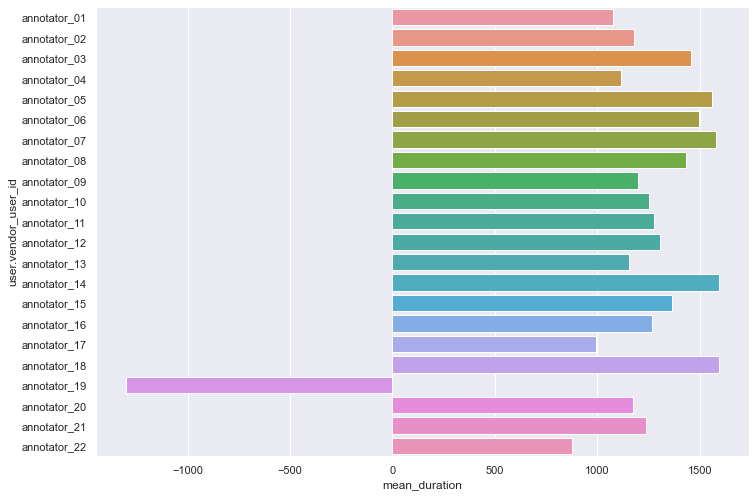

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data = annot_duration,
           x = "mean_duration",
           y = "user.vendor_user_id")

In [11]:
# Did all annotators produce the same amount of results, or are there differences?
annot_results = df.groupby("user.vendor_user_id", as_index= False)["task_input.image_url"].count()\
                  .rename(columns = {"task_input.image_url":"count"})
annot_results.sort_values(by = "count", ascending = False)

,user.vendor_user_id,count
1,annotator_02,7596
12,annotator_13,7078
7,annotator_08,6537
10,annotator_11,6436
3,annotator_04,6421
11,annotator_12,6210
19,annotator_20,6126
14,annotator_15,6088
5,annotator_06,5337
17,annotator_18,5170


In [50]:
print("average number of results per annotator: ", annot_results["count"].mean())

average number of results per annotator:  4130.454545454545


<AxesSubplot:xlabel='count', ylabel='user.vendor_user_id'>

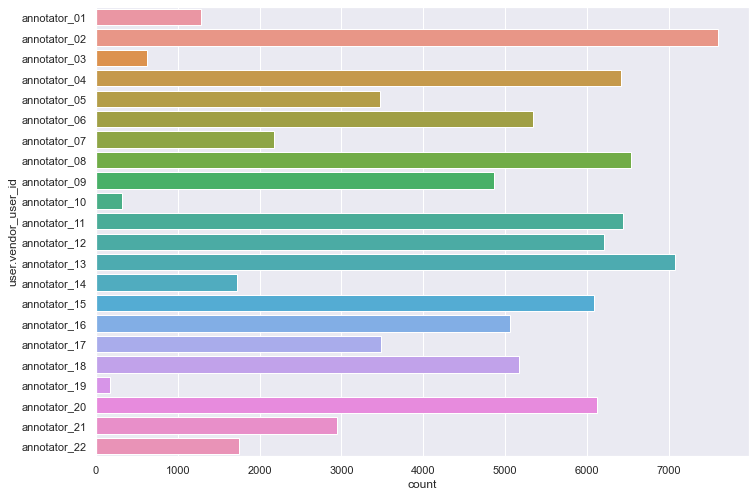

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data = annot_results,
           x = "count",
           y = "user.vendor_user_id")

    Annotator_19 generates the least amount of answers and seems to have "negative" answer durations. Perhaps there is an issue with their work

In [13]:
# Are there questions for which annotators highly disagree?
answer_df = df.groupby(["task_input.image_url","task_output.answer"], as_index=False)["created_at"].count()\
                .rename(columns={"created_at":"answer_count"})
answer_df = answer_df[answer_df["answer_count"]<10] # selecting the answers with disagreements
answer_df

,task_input.image_url,task_output.answer,answer_count
0,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,7
1,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,3
7,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,9
8,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,1
11,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,6
...,...,...,...
10782,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,2
10785,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,9
10786,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,1
10789,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,9


In [14]:
# Number of answers where annotators disagree
print("Number of answers where annotators disagree: ", len(answer_df["task_input.image_url"].unique()))

Number of answers where annotators disagree:  1718


    If we consider that 9 yes and 1 no (or vice versa) is not a "high" disagreement, we obtain:
  

In [15]:
answer_df = answer_df[answer_df["answer_count"]<9]
answer_df = answer_df[answer_df["answer_count"]>1]
# Number of answers where annotators disagree
print("Number of answers where annotators highly disagree: ", len(answer_df["task_input.image_url"].unique()))

Number of answers where annotators highly disagree:  635


### Information about task_output and answer trends

In [16]:
df["task_output.cant_solve"].value_counts() # Value count of the values of the field "Cant_solve"

False    90853
True        17
Name: task_output.cant_solve, dtype: int64

In [17]:
df["task_output.cant_solve"].value_counts(normalize=True) # Relative count of  the values of the field "Cant_solve"

False    0.999813
True     0.000187
Name: task_output.cant_solve, dtype: float64

In [18]:
df["task_output.corrupt_data"].value_counts() # Value count of the values of the field "Cant_solve"

False    90866
True         4
Name: task_output.corrupt_data, dtype: int64

In [19]:
df["task_output.corrupt_data"].value_counts(normalize=True) # Relative count of the values of the field "Cant_solve"

False    0.999956
True     0.000044
Name: task_output.corrupt_data, dtype: float64

    Most values (99,9% of the answers) are solvable and not corrupt. only 17 images can't be solved and 4 images are deemed corrupt

In [20]:
df["task_output.answer"].value_counts() 

yes    46132
no     44717
          21
Name: task_output.answer, dtype: int64

    The number of empty values in answers is equal to the sum of corrupt_data count and cant_solve count, and matches them in the dataframe

##### Checking the corrupt and unsolvable images

In [21]:
df_output_solve = df[["user.vendor_user_id","task_output.cant_solve"]]
df_output_corrupt = df[["user.vendor_user_id","task_output.corrupt_data"]]

df_output_solve = df_output_solve[df_output_solve["task_output.cant_solve"] == True]
df_output_corrupt = df_output_corrupt[df_output_corrupt["task_output.corrupt_data"] == True]

In [22]:
df_output_solve.groupby("user.vendor_user_id", as_index=False).count()\
                .rename(columns = {"task_output.cant_solve":"cant_solve_count"})\
                .sort_values(by= "cant_solve_count")

,user.vendor_user_id,cant_solve_count
2,annotator_07,1
4,annotator_11,1
5,annotator_14,1
6,annotator_18,1
7,annotator_20,1
0,annotator_02,2
3,annotator_08,2
1,annotator_04,4
8,annotator_22,4


In [23]:
df_output_corrupt.groupby("user.vendor_user_id", as_index=False).count()\
                .rename(columns = {"task_output.corrupt_data":"corrupt_count"})\
                .sort_values(by= "corrupt_count")

,user.vendor_user_id,corrupt_count
0,annotator_06,1
1,annotator_08,1
2,annotator_18,2


In [24]:
df_output= df[["user.vendor_user_id","task_output.cant_solve","task_output.corrupt_data"]]
df_output = df_output[(df_output["task_output.cant_solve"] == True) & (df_output["task_output.corrupt_data"] == True)]
df_output 

,user.vendor_user_id,task_output.cant_solve,task_output.corrupt_data


    Not annotators put true to both cant_solve and corrupt_data at the same time. Though it seems 9/22 annoatators found images that could not be solved and only 3/22 thought data was corrupted

### Information about the reference data

##### Is the reference Dataset balanced?

In [26]:
df1["answer"].value_counts(normalize = True)

yes    0.504677
no     0.495323
Name: answer, dtype: float64

In [51]:
df1["answer"].value_counts()

yes    4586
no     4501
Name: answer, dtype: int64

In [28]:
ref_balance = df1.groupby("answer", as_index = False)["image"].count() \
                 .rename(columns = {"image":"count"})
ref_balance

,answer,count
0,no,4501
1,yes,4586


([<matplotlib.patches.Wedge at 0x1f3af841eb0>,
 [Text(0.01616196209293889, 1.0998812622193845, 'no'),
  Text(-0.016161962092938537, -1.0998812622193845, 'yes')],
 [Text(0.008815615687057576, 0.5999352339378461, '49.5%\n4501'),
  Text(-0.008815615687057384, -0.5999352339378461, '50.5%\n4586')])

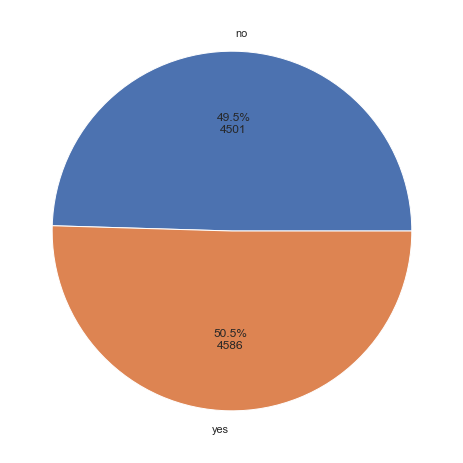

In [29]:
total = ref_balance['count'].sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)
plt.pie(ref_balance["count"], labels = ref_balance["answer"], autopct = fmt )

    With almost 50% for both images containing bicycle and images with no bicycles, the reference dataset is indeed balanced

##### Identifying good and bad annotators

In [30]:
# Getting the same image ids from the anonymized set
"""
This function extracts the image id that matches the reference set from the image_url
"""
def get_id(s):
    image = re.findall("img_\d{4,5}",s)
    return(image[0])

df["image"] = df["task_input.image_url"].apply(get_id)

In [43]:
# Comparing and evaluating
answers = df[["image","user.vendor_user_id","task_output.answer"]]
answers = answers.merge(df1, how= "inner", on= "image")
answers["eval"] = answers.apply(lambda x: "correct" if x["task_output.answer"] == x["answer"] else "incorrect", axis = 1)
answers

,image,user.vendor_user_id,task_output.answer,answer,eval
0,img_4686,annotator_12,no,no,correct
1,img_4686,annotator_11,no,no,correct
2,img_4686,annotator_22,no,no,correct
3,img_4686,annotator_17,no,no,correct
4,img_4686,annotator_02,no,no,correct
...,...,...,...,...,...
90865,img_2866,annotator_12,yes,yes,correct
90866,img_2866,annotator_16,yes,yes,correct
90867,img_2866,annotator_12,yes,yes,correct
90868,img_2866,annotator_04,yes,yes,correct


In [32]:
eval_df = answers[["user.vendor_user_id","eval","answer"]].groupby(["user.vendor_user_id","eval"]).count()\
       .rename(columns = {"answer":"count"})

In [33]:
rel_values = eval_df.groupby(level=0).apply(lambda x: x['count'] / x['count'].sum()) # computing the relative correctness

rv = []
for i in rel_values:
    rv.append(i*100)
eval_df['relative_value'] = rv # adding the relative correctness to the evaluation dataframe
eval_df

count  relative_value
user.vendor_user_id eval                            
annotator_01        correct     1214       94.843750
                    incorrect     66        5.156250
annotator_02        correct     7101       93.483412
                    incorrect    495        6.516588
annotator_03        correct      585       92.857143
                    incorrect     45        7.142857
annotator_04        correct     5960       92.820433
                    incorrect    461        7.179567
annotator_05        correct     3256       93.697842
                    incorrect    219        6.302158
annotator_06        correct     4945       92.655050
                    incorrect    392        7.344950
annotator_07        correct     1990       91.494253
                    incorrect    185        8.505747
annotator_08        correct     5878       89.918923
                    incorrect    659       10.081077
annotator_09        correct     4536       93.333333
                    incorrect    324        6.666667
annotator_10        correct      280       88.888889
                    incorrect     35       11.111111
annotator_11        correct     6026       93.629584
                    incorrect    410        6.370416
annotator_12        correct     5774       92.979066
                    incorrect    436        7.020934
annotator_13        correct     6702       94.687765
                    incorrect    376        5.312235
annotator_14        correct     1633       94.666667
                    incorrect     92        5.333333
annotator_15        correct     5774       94.842313
                    incorrect    314        5.157687
annotator_16        correct     4769       94.230389
                    incorrect    292        5.769611
annotator_17        correct     3283       94.203730
                    incorrect    202        5.796270
annotator_18        correct     4841       93.636364
                    incorrect    329        6.363636
annotator_19        correct      161       94.705882
                    incorrect      9        5.294118
annotator_20        correct     5809       94.825335
                    incorrect    317        5.174665
annotator_21        correct     2773       94.000000
                    incorrect    177        6.000000
annotator_22        correct     1644       94.212034
                    incorrect    101        5.787966

<AxesSubplot:xlabel='user.vendor_user_id'>

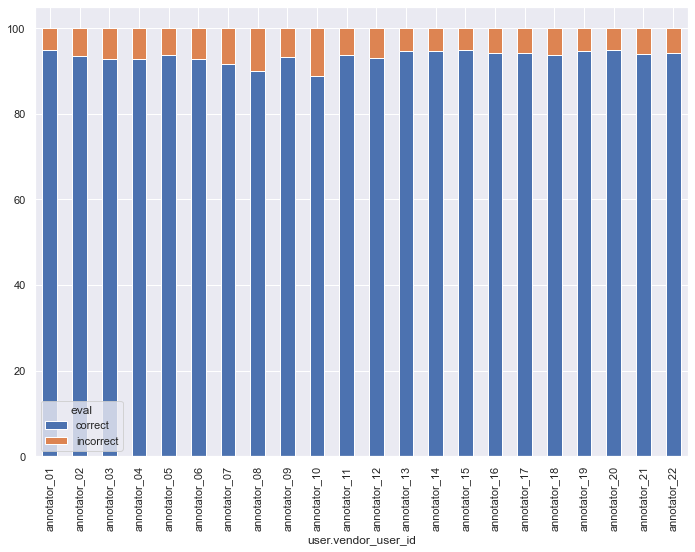

In [34]:
eval_df.unstack().plot(kind='bar', y ="relative_value", stacked=True)

    We can say that among our 22 annotators, the worst one is annotator_10 followed by annotator_8. Annotator_1 is the best and the rest are fairly close. These results are in terms of relative correctness among each annotator's total answers